## Visualisasi Data - Iris Dataset

In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# lib praproses data
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load dataset
dataset = pd.read_csv("../../dataset/dataset_iris.csv")

# lihat metadataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
# Set features and Labels
x = dataset[["sepal_length","sepal_width","petal_length","petal_width"]].values
y = dataset["species"].values

In [4]:
# proses normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(x)

In [5]:
# hasil normalisasi data
dataset = pd.concat([
  pd.DataFrame(scaled, columns=["sepal_length","sepal_width","petal_length","petal_width"]),
  pd.DataFrame(y, columns=["species"]),
], axis=1)

In [6]:
# cek hasil normalisasi data
print(dataset)

     sepal_length  sepal_width  petal_length  petal_width    species
0        0.222222     0.625000      0.067797     0.041667     setosa
1        0.166667     0.416667      0.067797     0.041667     setosa
2        0.111111     0.500000      0.050847     0.041667     setosa
3        0.083333     0.458333      0.084746     0.041667     setosa
4        0.194444     0.666667      0.067797     0.041667     setosa
..            ...          ...           ...          ...        ...
145      0.666667     0.416667      0.711864     0.916667  virginica
146      0.555556     0.208333      0.677966     0.750000  virginica
147      0.611111     0.416667      0.711864     0.791667  virginica
148      0.527778     0.583333      0.745763     0.916667  virginica
149      0.444444     0.416667      0.694915     0.708333  virginica

[150 rows x 5 columns]


1. Barplot

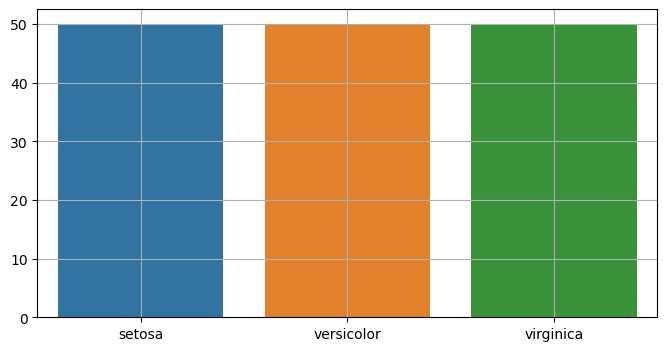

In [7]:
# create barplot
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(dataset, x="species", hue="species")
 
# set labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)
 
# show 
#plt.tight_layout()
plt.show()


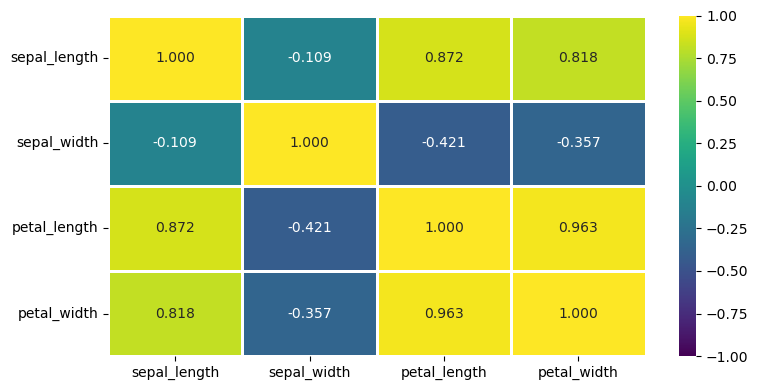

In [8]:
# create heatmap corr
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(
  dataset.corr(numeric_only=True), vmin=-1, vmax=1,
  cmap="viridis", annot=True, fmt=".3f", linewidths=1)
 
# set labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
 
# show plot
plt.tight_layout()
plt.show()


In [9]:
# function scatter plot
def scatter(data, x, y):
  
  # create scatter plots
  fig, ax = plt.subplots(figsize = (8,4))
  sns.scatterplot(data=data, x=x, y=y, hue="species")
 
  # set labels
  ax.set_title("", fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.legend(loc='upper left')
  ax.grid(True)
  plt.tight_layout()
 
  # show plots
  plt.tight_layout()
  plt.show()


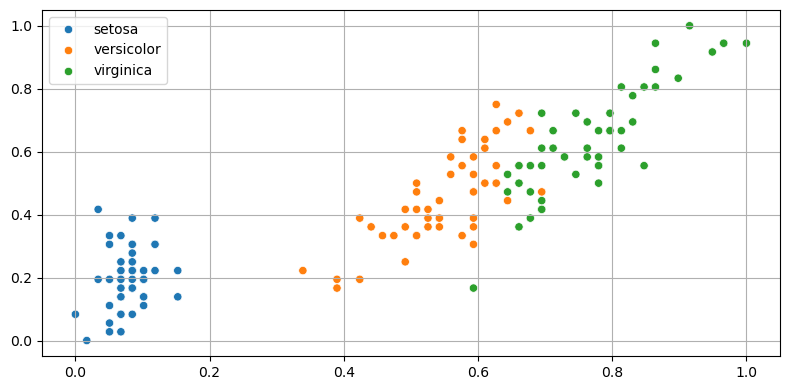

In [10]:
# call function scatter
scatter(dataset, "petal_length", "sepal_length")

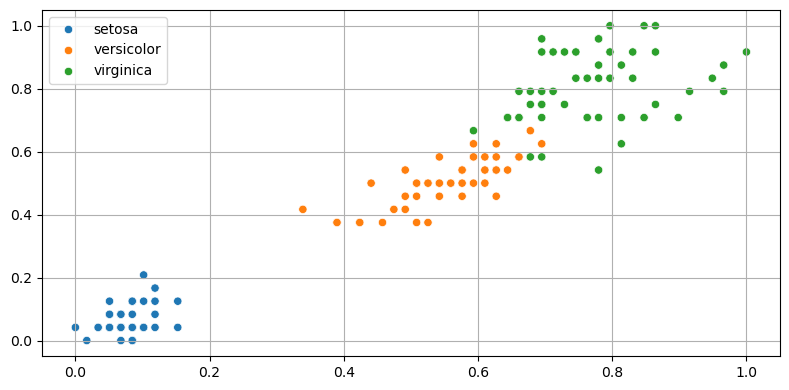

In [11]:
# call function scatter
scatter(dataset, "petal_length", "petal_width")

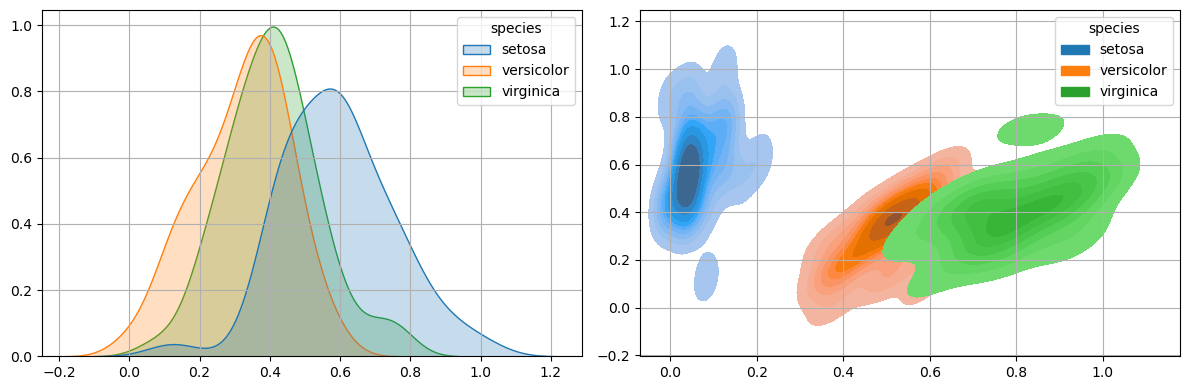

In [12]:
# create kdeplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.kdeplot(data=dataset, x="sepal_width", hue="species", fill=True, ax=ax[0])
ax[0].set_title("", fontsize=14)
ax[0].set_xlabel("", fontsize=12)
ax[0].set_ylabel("", fontsize=12)
ax[0].grid(True)
 
# create kdeplot
sns.kdeplot(data=dataset, x="petal_width", y="sepal_width", hue="species", fill=True, ax=ax[1])
ax[1].set_title("", fontsize=14)
ax[1].set_xlabel("", fontsize=12)
ax[1].set_ylabel("", fontsize=12)
ax[1].grid(True)
 
# show plots
plt.tight_layout()
plt.show()


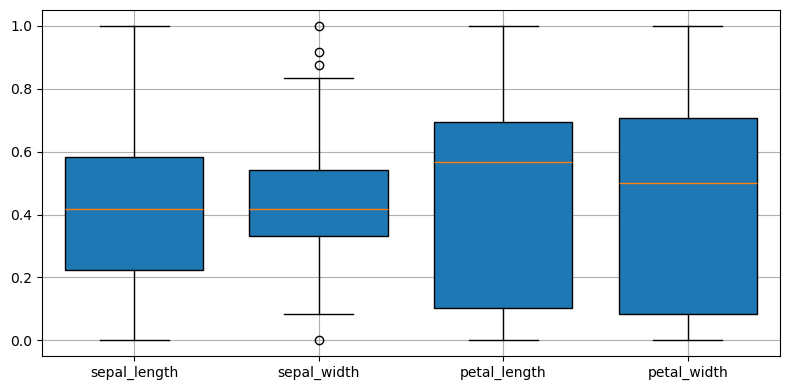

In [13]:
# define boxplot
fig, ax = plt.subplots(figsize=(8,4))
ax.boxplot(
  dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]],
  labels=["sepal_length", "sepal_width", "petal_length", "petal_width"],
  patch_artist=True, widths=(0.75, 0.75, 0.75, 0.75)
)
 
# set labels
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)
 
# show boxplot
plt.tight_layout()
plt.show()
